In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset=load_digits()

X, y=dataset.data, dataset.target
 
y_binary_imbalanced =y.copy() #copy data without link address
y_binary_imbalanced[y_binary_imbalanced !=1]=0

X_train, X_test, y_train, y_test =train_test_split(X,y_binary_imbalanced,random_state=0)

#### Desision functions

In [3]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(solver='liblinear').fit(X_train,y_train)

y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -23.176839154892054),
 (0, -13.54122861775263),
 (0, -21.722756841776015),
 (0, -18.907620657221656),
 (0, -19.736001146903334),
 (0, -9.749582893245197),
 (1, 5.234806478710577),
 (0, -19.307338225192247),
 (0, -25.101132885440638),
 (0, -21.82722742690894),
 (0, -24.15121817455028),
 (0, -19.57684534672679),
 (0, -22.574913718708228),
 (0, -10.82367271618541),
 (0, -11.912518474267),
 (0, -10.97957185512616),
 (1, 11.205993401631172),
 (0, -27.645916180127816),
 (0, -12.859359807941487),
 (0, -25.848694585225047)]

#### Precision-Recall curves

<IPython.core.display.Javascript object>


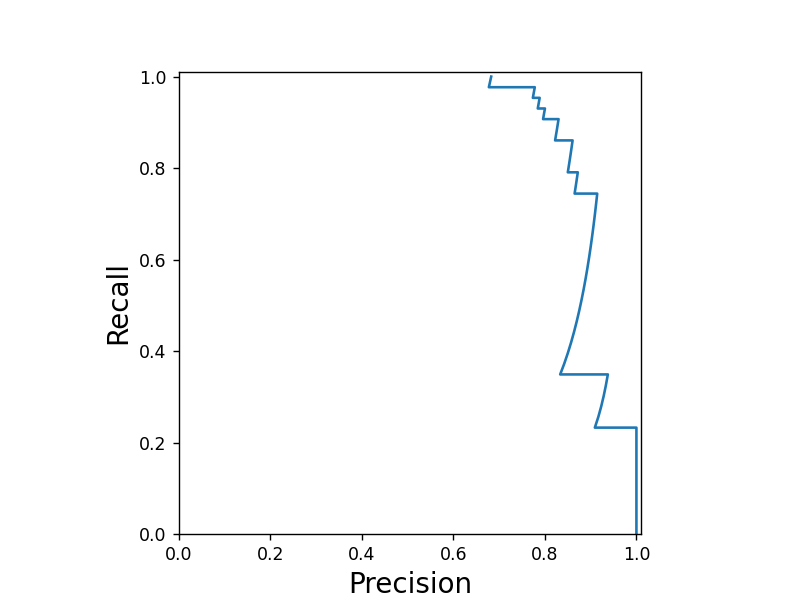

<ipython-input-9-a621e9e71457>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


In [9]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test,y_scores_lr)

plt.figure()
plt.xlim([0.0,1.01])
plt.ylim([0.0,1.01])
plt.plot(precision,recall,label='Precision-Recall Curve')
plt.xlabel('Precision',fontsize=16)
plt.ylabel('Recall',fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

#### ROC curve

<IPython.core.display.Javascript object>


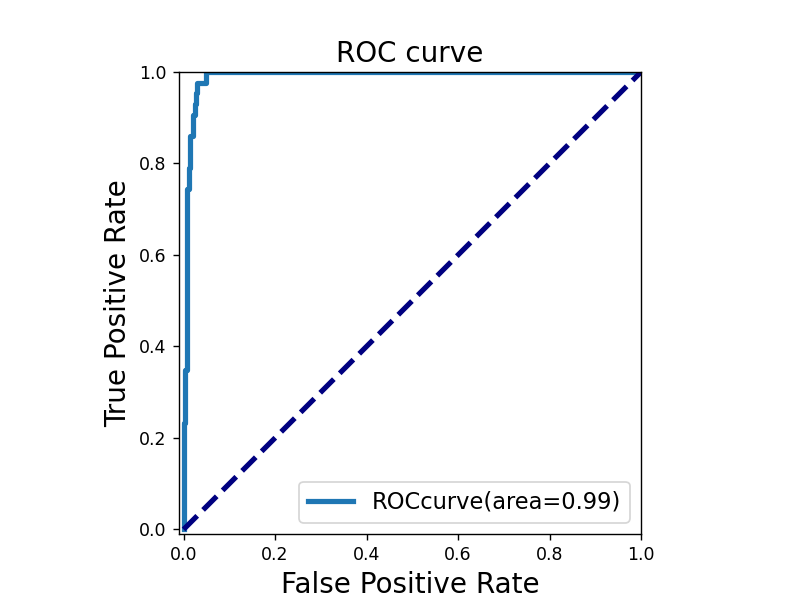

<ipython-input-14-43547b521432>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


In [14]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ =roc_curve(y_test,y_scores_lr)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.xlim([-0.01,1.00])
plt.ylim([-0.01,1.00])
plt.plot(fpr,tpr,lw=3,label='ROCcurve(area={:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('ROC curve',fontsize=16)
plt.legend(loc='lower right',fontsize=13)
plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
plt.axes().set_aspect('equal')
plt.show()


<IPython.core.display.Javascript object>


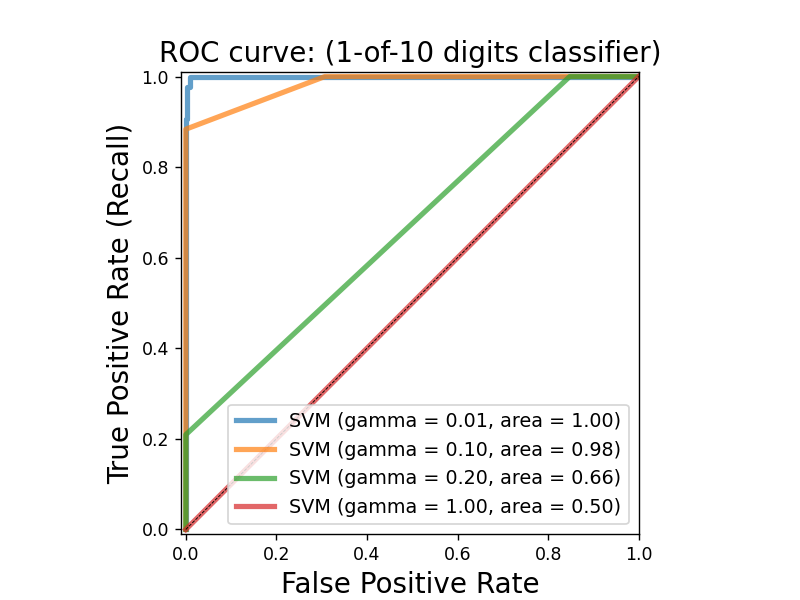

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


<ipython-input-16-f20044e51d5b>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


In [16]:
#from matplotlib import cm
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()